## Qubit Adder

In [2]:
%load_ext autoreload
%autoreload 2

import qiskit
import helpers.common as common
import helpers.gates as gates
import helpers.constants as constants

13 qubits used


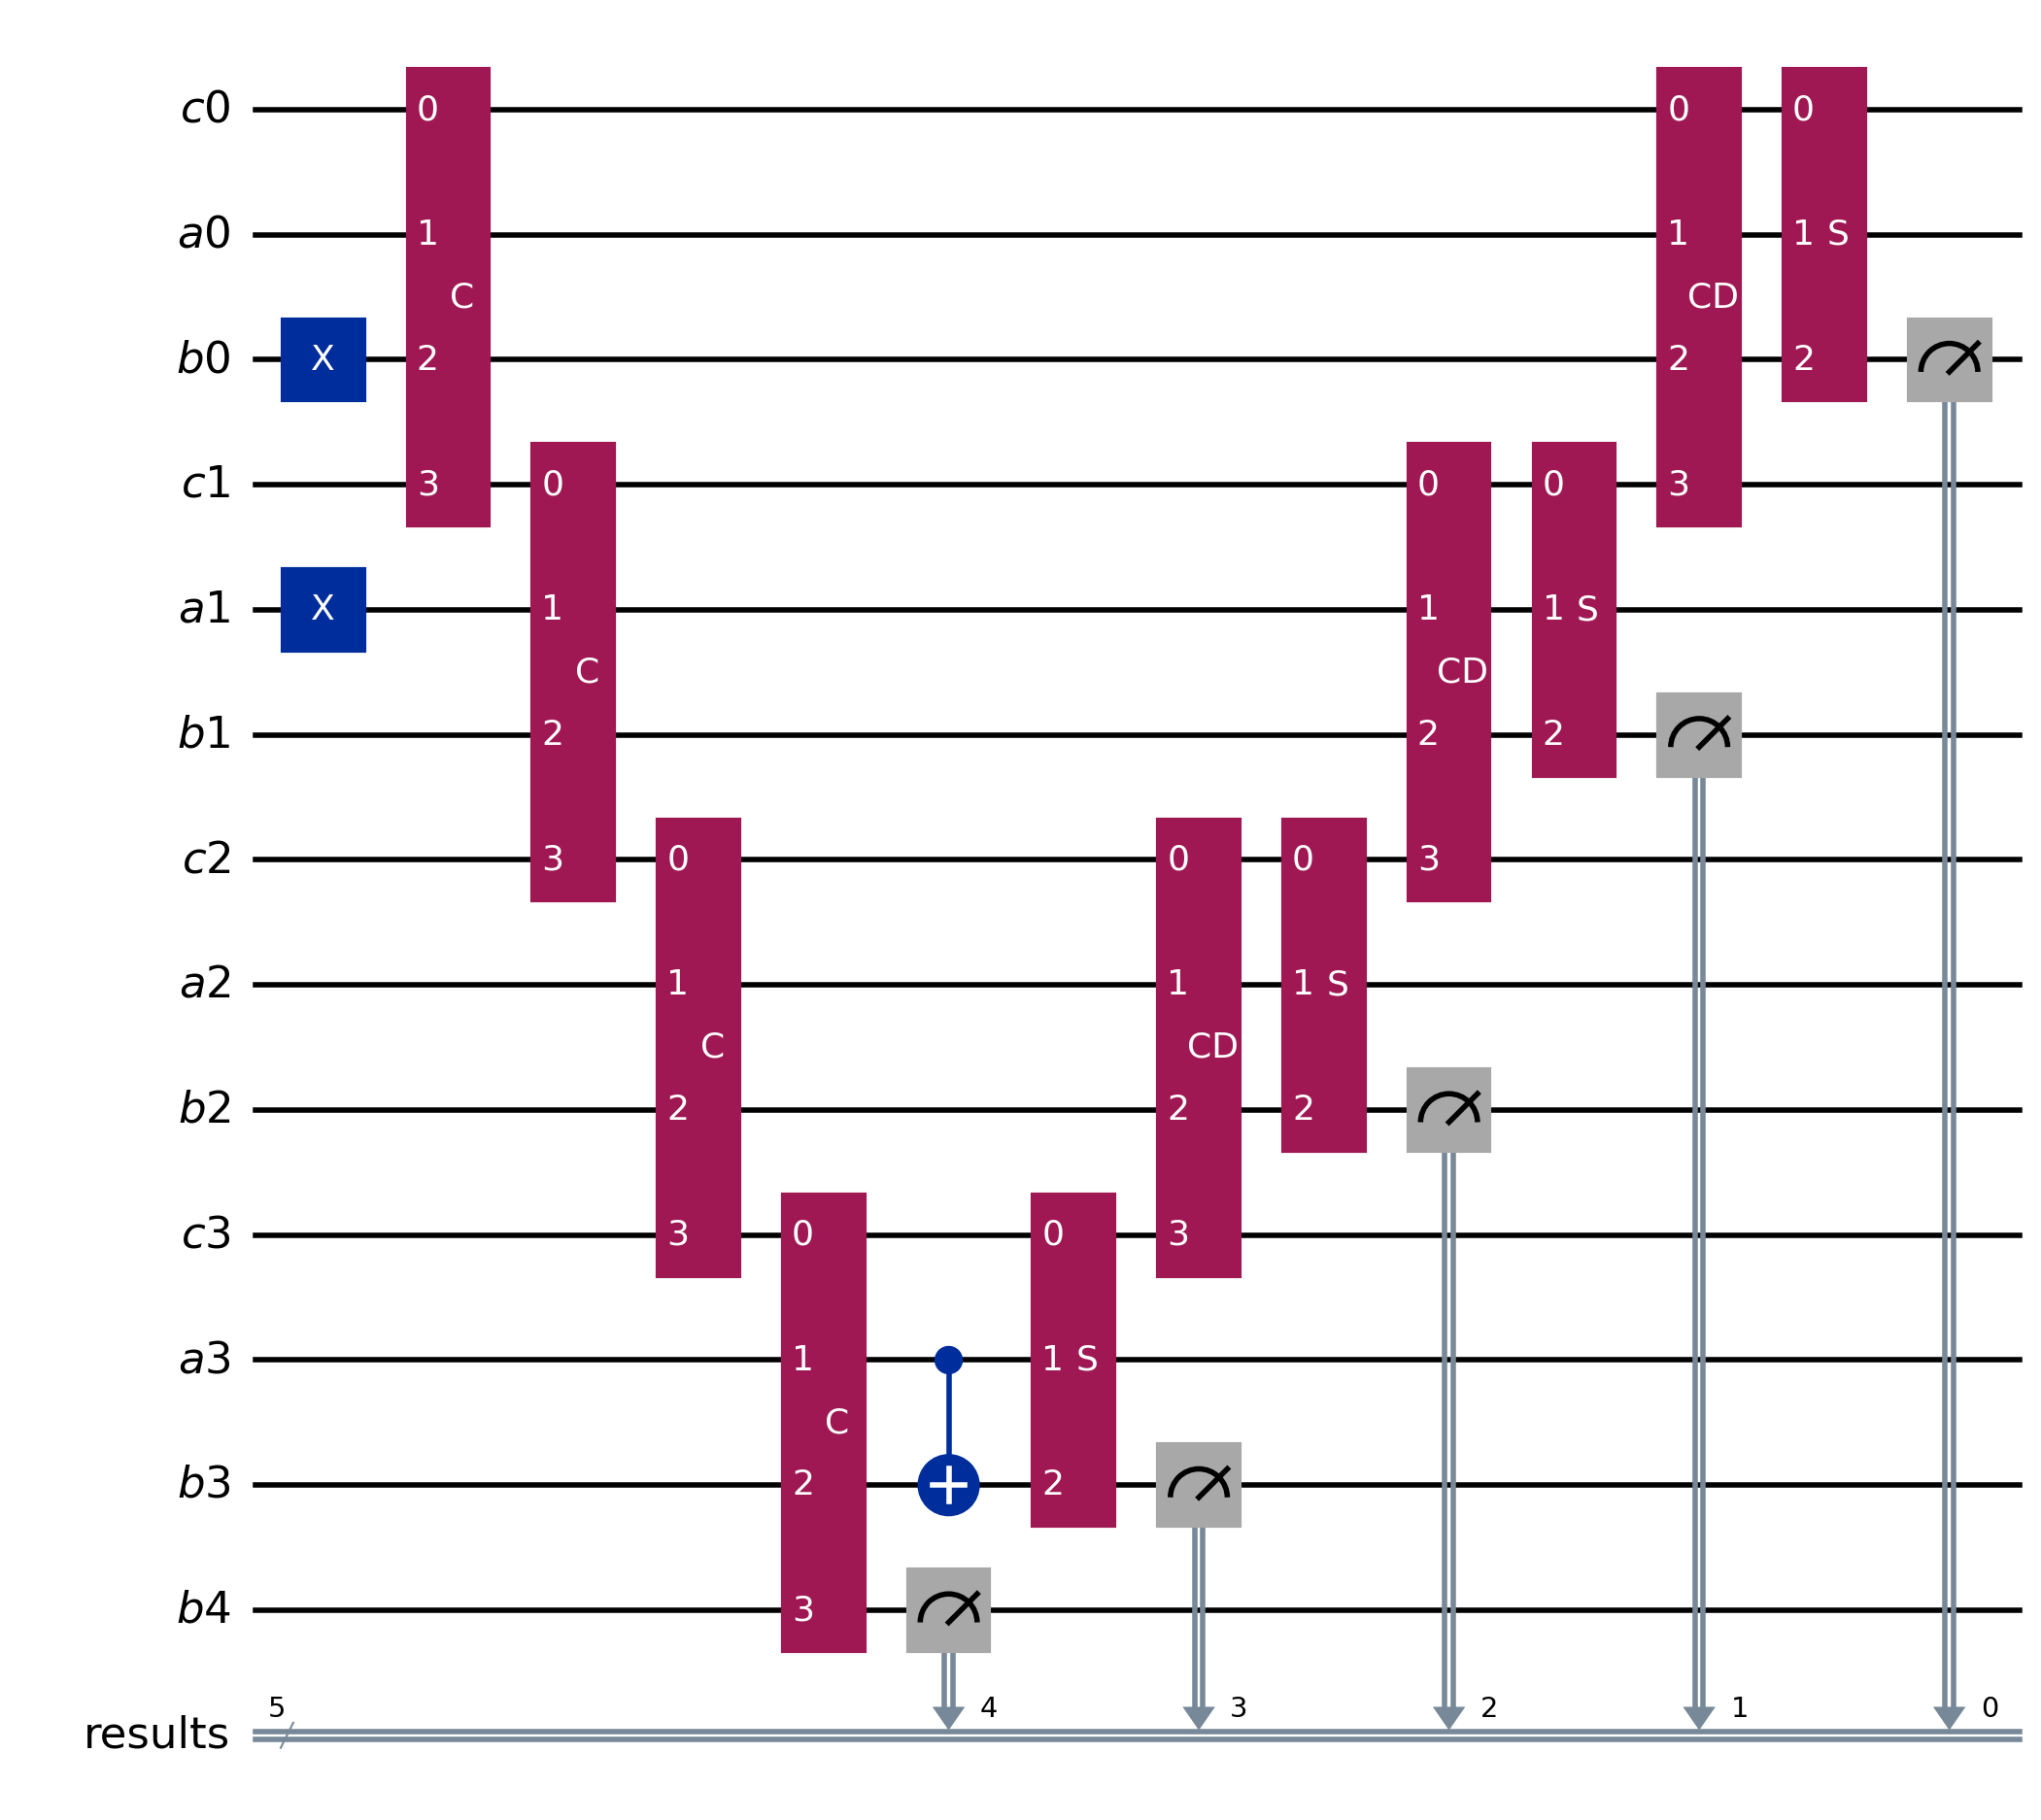

In [3]:
# Create quantum registers
creq = []
areq = []
breq = []
for i in range(constants.bits):
    creq.append(qiskit.QuantumRegister(1, f"c{i}"))
    areq.append(qiskit.QuantumRegister(1, f"a{i}"))
    breq.append(qiskit.QuantumRegister(1, f"b{i}"))
breq.append(qiskit.QuantumRegister(1, f"b{constants.bits}"))


# Combine quantum registers into a single list
req = []
for i in range(constants.bits):
    req.append(creq[i])
    req.append(areq[i])
    req.append(breq[i])
req.append(breq[constants.bits])

classical_req = qiskit.ClassicalRegister(constants.bits + 1, "results")
qc = qiskit.QuantumCircuit(*req, classical_req)

# Add X gates to set the initial values
for i in range(constants.bits):
    if constants.a[::-1][i] == "1":
        qc.x(areq[i])
    if constants.b[::-1][i] == "1":
        qc.x(breq[i])

# Add the carry and sum gates
for i in range(constants.bits):
    if i != constants.bits - 1:
        qc.append(gates.carry, [creq[i], areq[i], breq[i], creq[i + 1]])
    else:
        qc.append(gates.carry, [creq[i], areq[i], breq[i], breq[i + 1]])
        qc.cx(areq[i], breq[i])

for i in reversed(range(constants.bits)):
    qc.append(gates.sum, [creq[i], areq[i], breq[i]])
    if i != 0:
        qc.append(gates.reverse_carry, [creq[i - 1], areq[i - 1], breq[i - 1], creq[i]])

print(f"{qc.num_qubits} qubits used")

for i in range(constants.bits + 1):
    qc.measure(breq[i], classical_req[i])

qc.draw("mpl", fold=300, scale=2)

In [4]:
simulator = common.SimulatedQuantumComputer(qc, 512)
counts = simulator.run()

print(f"Sum: {simulator.most_common()}")

Sum: 00011


In [5]:
raise common.StopExecution

simulator = common.RealQuantumComputer(qc, 512)
counts = simulator.run("results")

print(f"Backend: {simulator.backend_name()}")
print(f"Most likely state: {simulator.most_common()}")

simulator.plot()

StopExecution: 